In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('price predict.csv') 

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  Exploratory Data Analysis

In [4]:
df.shape

(1460, 80)

In [5]:
df_n = df.select_dtypes([int,float])
df_o = df.select_dtypes(object)

In [6]:
print("total_numerical_columns",len(df_n.columns))
print("total_object_columns",len(df_o.columns))

total_numerical_columns 37
total_object_columns 43


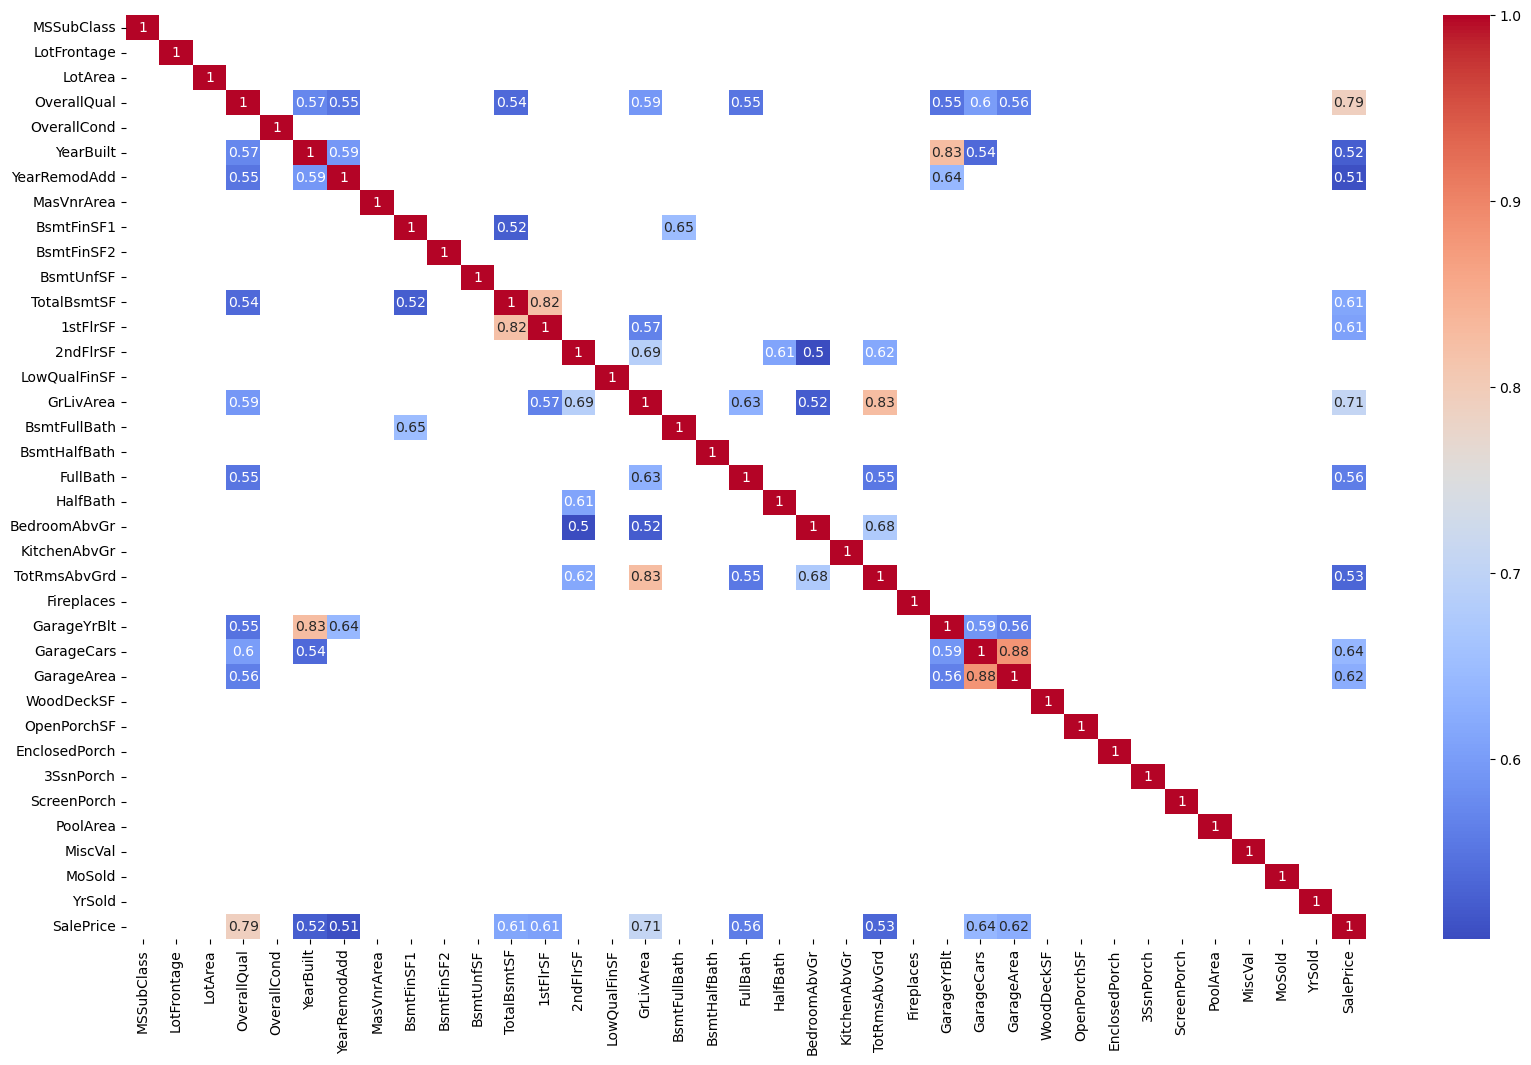

In [7]:
plt.figure(figsize=(20,12))
df_ncorr = df_n.corr()[df_n.corr()>0.5]
sns.heatmap(df_ncorr,cmap = "coolwarm",annot=True)
plt.show()

### SalePrice


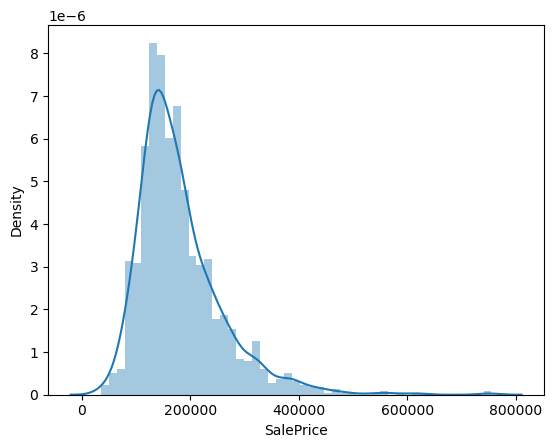

In [8]:
sns.distplot(df['SalePrice'])
plt.show()

In [9]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [10]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [11]:
df["Alley"] = df["Alley"].fillna("None")

In [12]:
df["Fence"] = df["Fence"].fillna("None")

In [13]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [14]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [15]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[i] = df[i].fillna('None')

In [16]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[i] = df[i].fillna(0)

In [17]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[i] = df[i].fillna('None')

In [18]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [19]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])


In [20]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [21]:
df = df.drop(['Utilities'], axis=1)


In [22]:
df["Functional"] = df["Functional"].fillna("Typ")

In [23]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [24]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [25]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [26]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [27]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [28]:
categorical_var = df.dtypes[df.dtypes == "object"]

Transforming some numerical variables that are really categorical

In [29]:
df['OverallCond'].dtype

dtype('int64')

In [30]:
#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

In [31]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [32]:
#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [33]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [35]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(df[c].values)) 
    df[c] = label_ec.transform(list(df[c].values))


In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,4,2,WD,Normal,208500
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,3,4,None,0,7,1,WD,Normal,181500
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,11,2,WD,Normal,223500
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,3,4,None,0,3,2,WD,Normal,250000


In [37]:
df = pd.get_dummies(df, drop_first=False)
print(df.shape)

(1460, 221)


In [38]:
df

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,65.0,8450,1,1,3,0,7,4,2003,...,False,False,False,True,False,False,False,False,True,False
1,4,80.0,9600,1,1,3,0,6,7,1976,...,False,False,False,True,False,False,False,False,True,False
2,9,68.0,11250,1,1,0,0,7,4,2001,...,False,False,False,True,False,False,False,False,True,False
3,10,60.0,9550,1,1,0,0,7,4,1915,...,False,False,False,True,True,False,False,False,False,False
4,9,84.0,14260,1,1,0,0,8,4,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,62.0,7917,1,1,3,0,6,4,1999,...,False,False,False,True,False,False,False,False,True,False
1456,4,85.0,13175,1,1,3,0,6,5,1978,...,False,False,False,True,False,False,False,False,True,False
1457,10,66.0,9042,1,1,3,0,7,8,1941,...,False,False,False,True,False,False,False,False,True,False
1458,4,68.0,9717,1,1,3,0,5,5,1950,...,False,False,False,True,False,False,False,False,True,False


In [39]:
X = df.drop('SalePrice',axis=1)  
y=df["SalePrice"]

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# sc = X- mean of feature/ standard deviation

In [45]:
sc_x = sc.fit_transform(X)

In [46]:
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.786430,-0.231877,-0.207142,0.064238,0.024699,0.750731,-0.225716,0.651479,-0.517200,1.050994,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.625160,0.437043,-0.091886,0.064238,0.024699,0.750731,-0.225716,-0.071836,2.179628,0.156734,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.786430,-0.098093,0.073480,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,0.984752,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,1.068748,-0.454850,-0.096897,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,-1.863632,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.786430,0.615421,0.375148,0.064238,0.024699,-1.378933,-0.225716,1.374795,-0.517200,0.951632,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.786430,-0.365661,-0.260560,0.064238,0.024699,0.750731,-0.225716,-0.071836,-0.517200,0.918511,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.625160,0.660016,0.266407,0.064238,0.024699,0.750731,-0.225716,-0.071836,0.381743,0.222975,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1.068748,-0.187282,-0.147810,0.064238,0.024699,0.750731,-0.225716,0.651479,3.078570,-1.002492,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.625160,-0.098093,-0.080160,0.064238,0.024699,0.750731,-0.225716,-0.795151,0.381743,-0.704406,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [47]:
columns_name = []
for i in range(1,221):
    columns_name.append("pca_"+str(i))

In [49]:
X_train = pd.DataFrame(sc_x,columns = columns_name)

In [50]:
X_train

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_211,pca_212,pca_213,pca_214,pca_215,pca_216,pca_217,pca_218,pca_219,pca_220
0,0.786430,-0.231877,-0.207142,0.064238,0.024699,0.750731,-0.225716,0.651479,-0.517200,1.050994,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.625160,0.437043,-0.091886,0.064238,0.024699,0.750731,-0.225716,-0.071836,2.179628,0.156734,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.786430,-0.098093,0.073480,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,0.984752,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,1.068748,-0.454850,-0.096897,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,-1.863632,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.786430,0.615421,0.375148,0.064238,0.024699,-1.378933,-0.225716,1.374795,-0.517200,0.951632,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.786430,-0.365661,-0.260560,0.064238,0.024699,0.750731,-0.225716,-0.071836,-0.517200,0.918511,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.625160,0.660016,0.266407,0.064238,0.024699,0.750731,-0.225716,-0.071836,0.381743,0.222975,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1.068748,-0.187282,-0.147810,0.064238,0.024699,0.750731,-0.225716,0.651479,3.078570,-1.002492,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.625160,-0.098093,-0.080160,0.064238,0.024699,0.750731,-0.225716,-0.795151,0.381743,-0.704406,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [52]:
from sklearn.decomposition import PCA

In [53]:
pc = PCA()

In [ ]:
dd = pd.DataFrame(pc.fit_transform(X_train),columns = columns_name)

In [60]:
eigen = pd.DataFrame(pc.explained_variance_,index = columns_name)

In [ ]:
eigen.to_csv("Eigen.csv")

In [62]:
pd.DataFrame({"eigen": pc.explained_variance_,
             "variance":pc.explained_variance_ratio_,
             "Cumulative_Sum":pc.explained_variance_ratio_.cumsum()})

,eigen,variance,Cumulative_Sum
0,1.435456e+01,6.520330e-02,0.065203
1,6.996215e+00,3.177920e-02,0.096982
2,6.206635e+00,2.819266e-02,0.125175
3,5.050602e+00,2.294156e-02,0.148117
4,3.914882e+00,1.778273e-02,0.165899
...,...,...,...
215,6.792512e-32,3.085391e-34,1.000000
216,6.792512e-32,3.085391e-34,1.000000
217,1.994032e-32,9.057573e-35,1.000000
218,9.275502e-33,4.213249e-35,1.000000


In [63]:
pca = PCA(n_components = 80)

In [66]:
pca.fit(X_train)

PCA(n_components=80)

In [69]:
pd.DataFrame(pca.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,3.149607,-1.214161,-0.338288,2.811541,0.116271,1.263386,-0.457299,-0.755524,0.021546,1.146552,...,-0.427418,-0.113034,-0.026517,-0.717659,0.360181,-0.111259,-0.119903,-0.182657,0.202777,-0.878232
1,-0.405813,2.948859,-0.366593,0.276711,0.584603,-0.807902,-0.520795,1.104871,1.201928,0.444976,...,-1.921784,1.747942,1.957796,-0.663317,-0.021801,-1.893863,-0.883426,0.505628,-0.291837,0.615608
2,3.457727,-0.843048,-0.090587,2.917747,0.224053,1.530392,-0.896480,-0.591320,0.153373,1.272240,...,-0.177721,-0.434926,-0.219157,-0.500730,0.674809,-0.309240,0.157752,0.055210,0.255574,-0.378014
3,-2.048719,-1.527321,2.566532,-0.102090,1.701398,-1.167641,-1.085949,0.113378,-1.214029,-0.924623,...,1.353647,-1.349663,1.107165,-0.567649,1.460025,0.009756,-0.227560,1.147246,0.230297,1.044603
4,5.446014,-0.586837,2.415454,3.111322,-0.069547,0.671431,-0.313692,-1.419685,0.466931,1.462989,...,-0.517631,-0.470068,0.264616,-0.184947,-0.691614,0.072932,0.296358,1.444694,-1.175058,0.378945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.730066,-2.204240,-0.033526,3.488351,0.787347,2.484980,-1.129929,0.546893,-0.686006,0.332557,...,0.278904,-0.018232,0.766640,0.550812,0.417050,-0.234994,0.519455,-0.143078,0.151807,-0.052341
1456,1.245273,4.557803,1.165760,-0.483744,-0.637564,-0.882703,0.986974,-0.363419,-0.273423,0.473083,...,-0.958253,0.089609,-0.268531,0.400084,-1.241068,-0.922249,0.412317,0.205956,0.560985,-0.131893
1457,0.243069,-1.726181,3.213972,1.051406,-1.381602,-3.133703,-0.831944,1.283780,4.572252,0.383491,...,1.015142,-0.844101,3.680499,1.214384,-2.978894,1.073875,0.317736,-0.217073,-0.078611,-1.746617
1458,-3.013057,3.093651,-1.595092,-1.600375,1.614165,-1.072527,0.210088,0.014124,-0.236145,0.493696,...,-1.465746,0.081515,0.621352,-0.555000,-0.564371,-0.478132,-0.308659,0.619733,-0.639473,0.142262


In [70]:
col = []
for i in range(1,81):
    col.append("pca"+str(i))

In [71]:
X_pca = pd.DataFrame(pca.fit_transform(X_train),columns = col)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,)